In [244]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
global hp
global hp1

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [216]:
def hypotheis_logistic(b,x):
	s=0
	for i in range(len(x)):
		s=s+(b[i]*x[i])
	try:
		l=1/(1+math.exp(-1*s))
	except OverflowError:
		return 0.999999999
	if l==1:
		return 0.999999999
	if l==0:
		return 0.000000001
	return l

In [206]:
def accuracy_logtsic(b,x,y):
  tr=0
  for i in range(len(x)):
    pr=hypotheis_logistic(b,x[i])
    if ( (pr>=0.5 and y[i]==1)or (pr<=0.5 and y[i]==0)):
      tr+=1
  return (tr/len(x))*100
    
  

In [207]:
def J_theta_logistic(x,y,b):
	s=0
	for i in range(len(y)):
		s=s+y[i]*math.log(hypotheis_logistic(b,x[i]))+(1-y[i])*math.log((1-hypotheis_logistic(b,x[i])))
	return -1*s/len(y)

In [208]:
def J_theta_dif(x,y,b,j):
	s=0
	global hp
	if j==0:
		hp=[]
		for i in range(len(y)):
			l=hypotheis_logistic(b,x[i])-y[i]
			s=s+l*x[i][j]
			hp.append(l)
	else:
		 for i in range(len(y)):
			 s=s+hp[i]*x[i][j]
	return s/len(y)

In [209]:
def gradient_desc(x,y,b,alpha):
	new_b=[]
	for i in range(len(b)):
		new_b.append(b[i]-alpha*J_theta_dif(x,y,b,i))
	return new_b

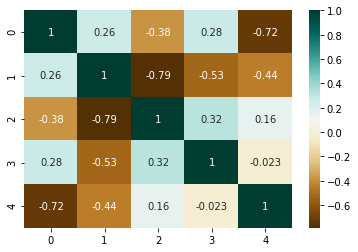

In [245]:
d = pd.read_csv("data_banknote_authentication.txt",sep=",",header=None)
c= d.corr()
sns.heatmap(c,cmap="BrBG",annot=True)
c
filtered_data = d.dropna(axis='columns', how='all')

np_array = filtered_data.to_numpy()

In [211]:
np.random.shuffle(np_array)
np_array=np.c_[np.ones(len(np_array)),np_array];
z=len(np_array)
x=np.split(np_array,[7*z//10,8*z//10])
X_train=x[0][:,0:len(x[0][0])-1]
Y_train=x[0][:,len(x[0][0])-1:]
X_vaildate =x[1][:,0:len(x[1][0])-1]
Y_vaildate=x[1][:,len(x[1][0])-1:]
X_test=x[2][:,0:len(x[2][0])-1]
Y_test=x[2][:,len(x[2][0])-1:]
print(X_train.shape,Y_train.shape)
print(X_vaildate.shape,Y_vaildate.shape)
print(X_test.shape,Y_test.shape)

(960, 5) (960, 1)
(137, 5) (137, 1)
(275, 5) (275, 1)


Streaming output truncated to the last 5000 lines.
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
27

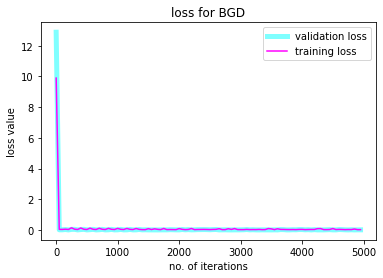

accuracy on train:  99.16666666666667
accuracy on test:  98.9090909090909


In [212]:
X=X_train
Y=Y_train
epocs=5000
b=[0]*(len(X[0]))
err_log=[]
err_val=[]
iter_log=[]
for i in range(epocs):
  print(i)
  b = gradient_desc(X,Y,b,10)
  if (i%50==0):
    err_log.append(J_theta_logistic(X,Y,b))
    err_val.append(J_theta_logistic(X_vaildate,Y_vaildate,b))
    iter_log.append(i)
  if(i>(epocs-10)):
    print(b)
print( "training error:  ",err_log[-1][0],"validate error:",err_val[-1][0])
plt.plot(iter_log,err_val,label="validation loss",linewidth=5,color="cyan",alpha=0.5)
plt.plot(iter_log,err_log,label="training loss",color="magenta")
plt.xlabel("no. of iterations")
plt.ylabel("loss value")
plt.title("loss for BGD")
plt.legend()
plt.show()
print("accuracy on train: " ,accuracy_logtsic(b,X,Y))
print("accuracy on test: " ,accuracy_logtsic(b,X_test,Y_test))


In [213]:
def scholastic_gradient_descent(x,y,b,alpha):
  new_b=[]
  for k in range(len(x)):
    for i in range(len(b)):
      new_b.append(b[i]-alpha*J_theta_dif_2(x,y,b,k,i))
    b=new_b
    new_b=[]
  return b

In [214]:
def J_theta_dif_2(x,y,b,i,j):
	return (hypotheis_logistic(b,x[i])-y[i])*x[i][j]

Streaming output truncated to the last 5000 lines.
45011
45012
45013
45014
45015
45016
45017
45018
45019
45020
45021
45022
45023
45024
45025
45026
45027
45028
45029
45030
45031
45032
45033
45034
45035
45036
45037
45038
45039
45040
45041
45042
45043
45044
45045
45046
45047
45048
45049
45050
45051
45052
45053
45054
45055
45056
45057
45058
45059
45060
45061
45062
45063
45064
45065
45066
45067
45068
45069
45070
45071
45072
45073
45074
45075
45076
45077
45078
45079
45080
45081
45082
45083
45084
45085
45086
45087
45088
45089
45090
45091
45092
45093
45094
45095
45096
45097
45098
45099
45100
45101
45102
45103
45104
45105
45106
45107
45108
45109
45110
45111
45112
45113
45114
45115
45116
45117
45118
45119
45120
45121
45122
45123
45124
45125
45126
45127
45128
45129
45130
45131
45132
45133
45134
45135
45136
45137
45138
45139
45140
45141
45142
45143
45144
45145
45146
45147
45148
45149
45150
45151
45152
45153
45154
45155
45156
45157
45158
45159
45160
45161
45162
45163
45164
45165
45166
45167
45168
4

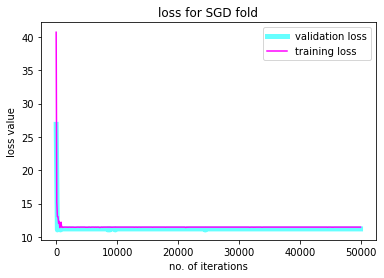

accuracy on train:  44.6875
accuracy on test:  42.90909090909091


In [217]:
b=[0]*(len(X[0]))
epocs=50000
err = []
err_v=[]
iter=[]
for i in range(epocs):
  print(i)
  id = np.random.choice(len(X), size=1)[0]
  b = scholastic_gradient_descent(X[id:id+1,:],Y[id:id+1,:],b,10)
  if (i%100==0):
    err.append(J_theta_logistic(X,Y,b))
    err_v.append(J_theta_logistic(X_vaildate,Y_vaildate,b))
    iter.append(i)
  if(i>(epocs-10)):
    print(b)
plt.plot(iter,err_v,label="validation loss",alpha=0.6,linewidth=5,color="cyan")
print( "training error:  ",err[-1][0],"validate error:",err_v[-1][0])
plt.plot(iter,err,label="training loss",color="magenta")
plt.xlabel("no. of iterations")
plt.ylabel("loss value")
plt.title("loss for SGD fold")
plt.legend()
plt.show()
print("accuracy on train: " ,accuracy_logtsic(b,X,Y))
print("accuracy on test: " ,accuracy_logtsic(b,X_test,Y_test))
    

In [232]:
X=X_train[:,1:]
from sklearn.linear_model import LogisticRegression
model=LogisticRegression(solver='liblinear')
model.fit(X,Y.ravel())
t0=model.intercept_
tall=model.coef_
print(t0,tall)
b= np.concatenate([t0,tall[0]])
print("accuracy on train: " ,accuracy_logtsic(b,X_train,Y_train))
print("accuracy on test: " ,accuracy_logtsic(b,X_test,Y_test))


[2.95088487] [[-2.81380062 -1.53516039 -1.89757225 -0.13047016]]
accuracy on train:  98.85416666666667
accuracy on test:  98.9090909090909


In [ ]:
def hypotheis_linear(x,b):
  return b.dot(x.T)

In [ ]:
def j_theta_linear_MSE(x,y,b):
  t = b.dot(x.T)
  t = np.subtract(t,y.T)
  t =np.square(t)
  return np.sum(t)/len(y)


In [ ]:
def j_theta_linear_RMSE(x,y,b):
  return math.sqrt(j_theta_linear_MSE(x,y,b))

In [ ]:
def j_theta_linear_MAE_wo(x,y,b):
  t = b.dot(x.T)
  t = np.subtract(t,y.T)
  return np.sum(t)/len(y)

In [ ]:
def j_theta_linear_MAE(x,y,b):
  t = b.dot(x.T)
  t = np.subtract(t,y.T)
  t = np.absolute(t)
  return np.sum(t)/len(y)

In [ ]:
def j_theta_dif_MAE(x,y,b):
  t = b.dot(x.T)
  t = np.subtract(t,y.T)
  t = np.sign(t)
  xj = t.dot(x)
  return xj/len(y)

In [ ]:
def J_theta_linear_dif_MSE(x,y,b):
  t = b.dot(x.T)
  t = np.subtract(t,y)
  xj = t.dot(x)
  return xj/len(y)

In [ ]:
def j_theta_dif_RMSE(x,y,b):
  # print(x.shape,b.shape)
  t = b.dot(x.T)
  # print(t.shape)
  t = np.subtract(t,y.T)
  xj = t.dot(x)
  # print(xj.shape)
  return xj/len(y)


In [ ]:
def gradient_desc_linear_RMSE(x,y,b,alpha):
	return b - alpha*j_theta_dif_RMSE(x,y,b)/j_theta_linear_RMSE(x,y,b)

In [ ]:
def gradient_desc_linear_MSE(x,y,b,alpha):
	return b - alpha*J_theta_linear_dif_MSE(x,y,b)

In [ ]:
def gradient_desc_linear_MAE(x,y,b,alpha):
	return b - alpha*j_theta_dif_MAE(x,y,b)

In [ ]:
d = pd.read_csv("Dataset.data",sep=" ",header=None)
filtered_data = d.dropna(axis='columns', how='all')
np_array = filtered_data.to_numpy()

np_array=np_array[1:,1:]
np_array=np_array.astype(np.float)
print(np_array.shape)

In [ ]:
def k_fold_division(np_array,k,epocs,alpha):
  print(np_array.shape)
  
  fold=np.array_split(np_array,k)
  iterations=[]
  train_loss =[0]*epocs
  valid_loss=[0]*epocs
  for i in range(k):
    X=fold.copy()
    test=X[i][:]
    X=np.concatenate(X[:i]+X[i+1:],axis=0)
    train_X = X[:,0:len(X[0])-1]
    train_X=np.c_[np.ones(len(train_X)),train_X];
    train_Y = X[:,len(X[0])-1:]
    b=[0]*(len(X[0]))
    b= np.asarray(b)
    test_X=test[:,0:len(X[0])-1]
    test_X = np.c_[np.ones(len(test_X)),test_X]
    test_Y =test[:,len(X[0])-1:]
    for i in range(epocs):
      b = gradient_desc_linear_MSE(train_X,train_Y,b,alpha)
      train_loss[i]=train_loss[i]+j_theta_linear_MSE(train_X,train_Y,b)
      valid_loss[i]=valid_loss[i]+j_theta_linear_MSE(test_X,test_Y,b)
  for i in range(epocs):
    train_loss[i]=train_loss[i]/k
    valid_loss[i]=valid_loss[i]/k
    iterations.append(i+1)
  print(train_loss[epocs-1],valid_loss[epocs-1])
  return train_loss[epocs-1],valid_loss[epocs-1]
  plt.plot(iterations,valid_loss,label="validation loss",alpha=0.6,linewidth=5,color="cyan")
  plt.plot(iterations,train_loss,label="training loss",color="magenta")
  plt.xlabel("no. of iterations")
  plt.ylabel("loss value")
  plt.title("loss for MAE 10 fold")
  plt.legend()
  plt.show()


In [ ]:
k_fold_division(np_array,10,5000,0.6)

In [ ]:
ax=[]
ay=[]
k_iter=[]
np.random.shuffle(np_array)
for i in range(2,21):
  z=k_fold_division(np_array,i,1200,0.6)
  ax.append(z[0])
  ay.append(z[1])
  k_iter.append(i)
plt.plot(k_iter,ay,label="validation loss",alpha=0.6,linewidth=1,color="cyan")
plt.plot(k_iter,ax,"--",label="training loss",color="red")
plt.xlabel("k value")
plt.ylabel("loss value")
plt.title("loss")
plt.legend()
plt.show()

In [ ]:
def compare(np_array,k):
  print(np_array.shape)
  np.random.shuffle(np_array)
  fold=np.array_split(np_array,k)
  iterations=[]
  epocs=5000
  valid_loss_RMSE =[0]*epocs
  valid_loss_MAE=[0]*epocs
  for i in range(k):
    X=fold.copy()
    test=X[i][:]
    X=np.concatenate(X[:i]+X[i+1:],axis=0)
    train_X = X[:,0:len(X[0])-1]
    train_X=np.c_[np.ones(len(train_X)),train_X];
    train_Y = X[:,len(X[0])-1:]
    b1=[0]*(len(X[0]))
    b2=[0]*(len(X[0]))
    b1= np.asarray(b1)
    b2= np.asarray(b2)
    test_X=test[:,0:len(X[0])-1]
    test_X = np.c_[np.ones(len(test_X)),test_X]
    test_Y =test[:,len(X[0])-1:]
    for i in range(epocs):
      b1 = gradient_desc_linear_RMSE(train_X,train_Y,b1,0.6)
      b2 = gradient_desc_linear_MAE(train_X,train_Y,b2,0.6)
      valid_loss_RMSE[i]=valid_loss_RMSE[i]+j_theta_linear_MSE(train_X,train_Y,b1)
      valid_loss_MAE[i]=valid_loss_MAE[i]+j_theta_linear_MSE(test_X,test_Y,b2)
  for i in range(epocs):
    valid_loss_RMSE[i]=valid_loss_RMSE[i]/k
    valid_loss_MAE[i]=valid_loss_MAE[i]/k
    iterations.append(i+1)
  print("RMSE", valid_loss_RMSE[epocs-1],"\nMAE", valid_loss_MAE[epocs-1])
  
  plt.plot(iterations,valid_loss_MAE,label="validation loss MAE",alpha=0.6,linewidth=1,color="cyan")
  plt.plot(iterations,valid_loss_RMSE,label="validation loss RMSE",alpha=0.6,color="magenta")
  plt.xlabel("no. of iterations")
  plt.ylabel("loss value")
  plt.title("loss for MSE 10 fold (MAE vs RMSE)")
  plt.legend()
  plt.show()


In [ ]:
compare(np_array,10)

In [ ]:
def normal_closed_form(x,y):
  xtx = np.dot(x.T,x)
  xty = np.dot(x.T,y)
  xtx_inv = np.linalg.inv(xtx)
  det = np.linalg.det(xtx)
  return np.dot(xtx_inv,xty).T

In [ ]:
fold=np.array_split(np_array,10)
iterations=[]
train_loss =0
valid_loss=0
for i in range(10):
  X=fold.copy()
  test=X[i][:]
  X=np.concatenate(X[:i]+X[i+1:],axis=0)
  train_X = X[:,0:len(X[0])-1]
  train_X=np.c_[np.ones(len(train_X)),train_X];
  train_Y = X[:,len(X[0])-1:]
  test_X=test[:,0:len(X[0])-1]
  test_X = np.c_[np.ones(len(test_X)),test_X]
  test_Y =test[:,len(X[0])-1:]
  b3= normal_closed_form(train_X,train_Y)
  print("training loss at fold: ",i+1,j_theta_linear_RMSE(train_X,train_Y,b3))
  train_loss+=j_theta_linear_RMSE(train_X,train_Y,b3)
  print("validation loss at fold: ",i+1,j_theta_linear_RMSE(test_X,test_Y,b3))
  valid_loss+=j_theta_linear_RMSE(train_X,train_Y,b3)
print("average:", "training: ",train_loss/10,"validation loss", valid_loss/10)


In [ ]:
d = pd.read_csv("VideoGameDataset - Video_Games_Sales_as_at_22_Dec_2016.csv",usecols=[9,10,12],sep=",",header=None)
filtered_data = d.dropna()
print(filtered_data)
filtered_data=filtered_data[filtered_data[12]!='tbd']
np_array = filtered_data.to_numpy()

np_array=np_array[1:,:]
print(len(np_array))

np_array=np_array.astype(np.float)
np_array[:,[0,2]]=np_array[:,[2,0]]
print(np_array)

In [ ]:
k_fold_division(np_array,10,1200,0.00001)